In [1]:
import numpy as np
from pylab import *
import astropy.units as uu
import astropy.constants as cc
import scipy.interpolate as II

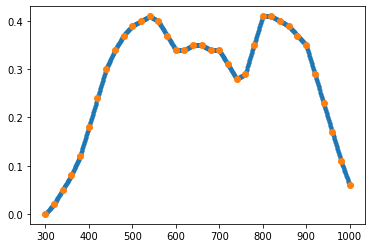

In [2]:

throughput_string = """300	0.00
320	0.02
340	0.05
360	0.08
380	0.12
400	0.18
420	0.24
440	0.30
460	0.34
480	0.37
500	0.39
520	0.40
540	0.41
560	0.40
580	0.37
600	0.34
620	0.34
640	0.35
660	0.35
680	0.34
700	0.34
720	0.31
740	0.28
760	0.29
780	0.35
800	0.41
820	0.41
840	0.40
860	0.39
880	0.37
900	0.35
920	0.29
940	0.23
960	0.17
980	0.11
1000	0.06""" # From photon budget 0.9

lam, thpts = np.fromstring(throughput_string, sep="\t").reshape((36,2)).T
thpt_function_nm = II.interp1d(lam, thpts)

x = np.linspace(300,1000,1000)

plot(x, thpt_function_nm(x), '.')
plot(lam, thpts, 'o')

def A_tel():
    return np.pi*(16.1/2*uu.cm)**2

def f_lambda_to_DN(ll, f_lambda, dl, exptime):
    """ Convert f_lambda [spectral density] to e-
    Args:
        ll[N]: Array of wavelengths
        f_lambda[N]: Array of f_lambdas [spectral density]
        dl[N]: Delta wavelength per (likely) pixel
        exptime: exposure time
    """
    
    epp = cc.h*cc.c/ll
    
    return (f_lambda * exptime * A_tel() * dl * thpt_function_nm(ll.to(uu.nm).value) / epp).decompose()
    

In [3]:
fl = uu.erg/uu.s/uu.cm**2/uu.angstrom
q = f_lambda_to_DN(500*uu.nm, 1*fl, 1*uu.angstrom, 900*uu.s)

In [4]:
q

<Quantity 1.79863078e+16>